In [94]:
from itertools import cycle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from lab5.ЛР5_Рыбаков_4 import predictions

# Чтение данных

In [95]:
df = pd.read_csv('pop.csv')
df.shape

(10210, 33)

In [96]:
df.head(5)

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1030,NaN,NaN,2021,1,4,1175948.0,26106.0,87398.0,NaN,...,27217.0,21181.0,13953.0,17519.0,NaN,NaN,NaN,NaN,0.0,25765.0
1,1030,NaN,NaN,2021,2,4,1217451.0,25831.0,86477.0,NaN,...,34925.0,27390.0,17744.0,25801.0,NaN,NaN,NaN,NaN,0.0,25197.0
2,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
3,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
4,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10210 entries, 0 to 10209
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  10210 non-null  int64  
 1   Admin1   82 non-null     float64
 2   SubDiv   144 non-null    object 
 3   Year     10210 non-null  int64  
 4   Sex      10210 non-null  int64  
 5   Frmat    10210 non-null  int64  
 6   Pop1     10210 non-null  float64
 7   Pop2     10074 non-null  float64
 8   Pop3     10074 non-null  float64
 9   Pop4     5928 non-null   float64
 10  Pop5     5928 non-null   float64
 11  Pop6     5928 non-null   float64
 12  Pop7     10074 non-null  float64
 13  Pop8     10056 non-null  float64
 14  Pop9     10074 non-null  float64
 15  Pop10    10056 non-null  float64
 16  Pop11    10074 non-null  float64
 17  Pop12    10056 non-null  float64
 18  Pop13    10074 non-null  float64
 19  Pop14    10056 non-null  float64
 20  Pop15    10074 non-null  float64
 21  Pop16    100

In [98]:
df = df[df['Country'] == 4050].groupby(by='Year').sum().reset_index()
display(df)

,Year,Country,Admin1,SubDiv,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1950,8100,0.0,0,3,2,4281300.0,77800.0,77100.0,83000.0,...,182300.0,151300.0,114000.0,71400.0,36500.0,17100.0,0.0,0.0,0.0,79558.0
1,1951,8100,0.0,0,3,4,4303700.0,78100.0,330700.0,0.0,...,184200.0,153600.0,114700.0,72300.0,37000.0,16700.0,0.0,0.0,0.0,76559.0
2,1952,8100,0.0,0,3,4,4333800.0,75800.0,316100.0,0.0,...,187100.0,156600.0,116800.0,75300.0,38400.0,17300.0,0.0,0.0,0.0,76943.0
3,1953,8100,0.0,0,3,4,4369300.0,77800.0,305800.0,0.0,...,189500.0,159500.0,118700.0,78200.0,38900.0,18100.0,0.0,0.0,0.0,78261.0
4,1954,8100,0.0,0,3,4,4405700.0,77000.0,301800.0,0.0,...,193400.0,161700.0,121600.0,80500.0,40000.0,18500.0,0.0,0.0,0.0,76365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2017,8100,0.0,0,3,0,5759855.0,62106.0,61147.0,58363.0,...,340906.0,326284.0,320660.0,205922.0,133151.0,75542.0,34391.0,10042.0,0.0,62196.0
68,2018,8100,0.0,0,3,0,5788917.0,62321.0,62446.0,61383.0,...,341872.0,321973.0,327634.0,217342.0,139402.0,76228.0,34393.0,10021.0,0.0,62019.0
69,2019,8100,0.0,0,3,0,5813487.0,60980.0,62576.0,62621.0,...,343302.0,319458.0,327423.0,232017.0,145231.0,78064.0,34744.0,10215.0,0.0,61685.0
70,2020,8100,0.0,0,3,0,5824678.0,61709.0,61180.0,62545.0,...,345752.0,318835.0,322078.0,248655.0,151702.0,81040.0,34712.0,10557.0,0.0,61240.0


In [99]:
df = df[['Year', 'Pop1']]
df.columns = ['year','pop']
print(df.shape)
display(df)

(72, 2)


,year,pop
0,1950,4281300.0
1,1951,4303700.0
2,1952,4333800.0
3,1953,4369300.0
4,1954,4405700.0
...,...,...
67,2017,5759855.0
68,2018,5788917.0
69,2019,5813487.0
70,2020,5824678.0


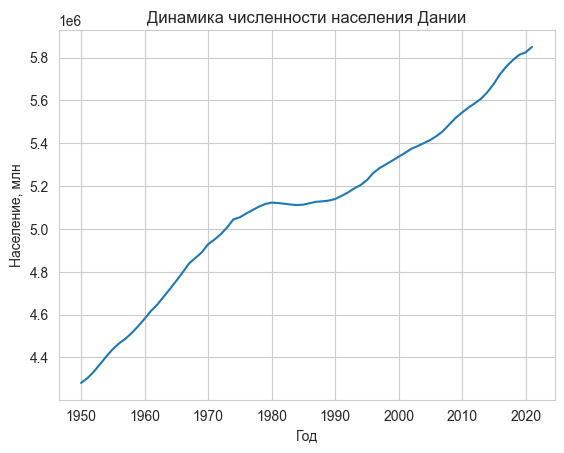

In [100]:
sns.lineplot(data=df, x='year', y='pop')
plt.title('Динамика численности населения Дании')
plt.xlabel('Год')
plt.ylabel('Население, млн')
plt.show()

# Проверка ряда на стационарность

In [101]:
from statsmodels.tsa.stattools import acf, adfuller

n= 21
acf_values = acf(df['pop'], nlags=n, fft=False)

for i in range(1, n):
    print(f'r{i}: {acf_values[i]:.2f}')

r1: 0.95
r2: 0.89
r3: 0.84
r4: 0.78
r5: 0.73
r6: 0.68
r7: 0.63
r8: 0.58
r9: 0.53
r10: 0.49
r11: 0.44
r12: 0.40
r13: 0.36
r14: 0.32
r15: 0.28
r16: 0.25
r17: 0.22
r18: 0.19
r19: 0.16
r20: 0.13


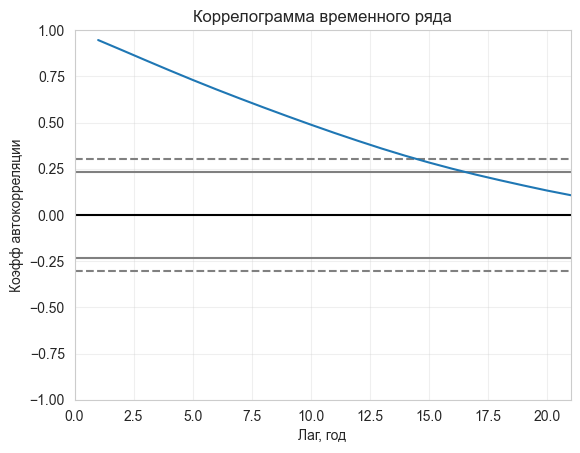

In [102]:
pd.plotting.autocorrelation_plot(df['pop'])
plt.title(f'Коррелограмма временного ряда')
plt.xlim(0, n)
plt.ylabel("Коэфф автокорреляции")
plt.xlabel('Лаг, год')
plt.grid(True, alpha=0.3)
plt.show()

In [103]:
from pprint import pprint
from statsmodels.tsa.stattools import adfuller
res = adfuller(df['pop'])

print(f'adf: {res[0]:.2f}')
print(f'p: {res[1]:.2f}')
print(f'critical values:')
pprint(res[4])

adf: -0.87
p: 0.80
critical values:
{'1%': np.float64(-3.5274258688046647),
 '10%': np.float64(-2.5893204081632653),
 '5%': np.float64(-2.903810816326531)}


# Выделение сезонной и циклической составляющих

3
0


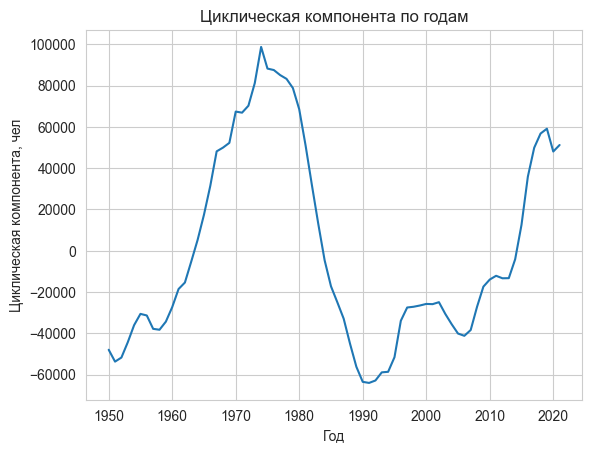

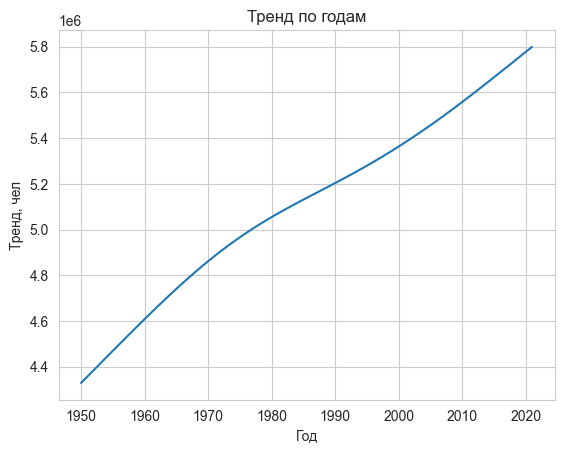

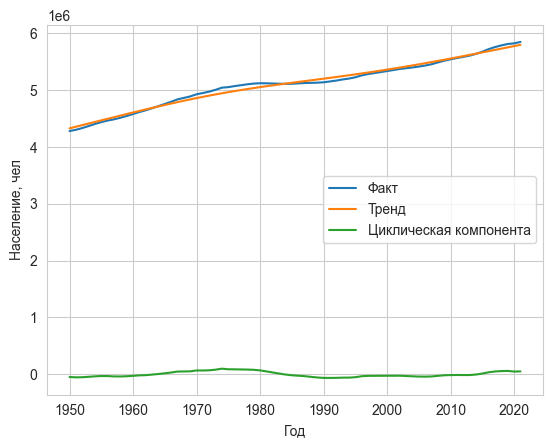

In [104]:
import statsmodels.api as sm

cycle, trend = sm.tsa.filters.hpfilter(df['pop'], lamb=10000)

df['trend'] = trend
df['cycle'] = cycle

zero_crossings = np.where(np.diff(np.sign(df['trend'])))[0]
n_trend = len(zero_crossings)

zero_crossings = np.where(np.diff(np.sign(df['cycle'])))[0]
n_cycles = len(zero_crossings)

print(n_cycles)
print(n_trend)

sns.lineplot(df, y='cycle', x='year')
plt.title('Циклическая компонента по годам')
plt.xlabel('Год')
plt.ylabel('Циклическая компонента, чел')
plt.show()


sns.lineplot(df, y='trend', x='year')
plt.title('Тренд по годам')
plt.xlabel('Год')
plt.ylabel('Тренд, чел')
plt.show()

sns.lineplot(df, y='pop', x='year', label='Факт')
sns.lineplot(df, y='trend', x='year', label='Тренд')
sns.lineplot(df, y='cycle', x='year',label='Циклическая компонента')
plt.xlabel('Год')
plt.ylabel('Население, чел')
plt.legend()
plt.show()



# Определение аномальных уровней

,year,pop,trend,cycle,pop_diff
0,1950,4281300.0,4.329187e+06,-47886.520625,NaN
1,1951,4303700.0,4.357329e+06,-53629.395762,22400.0
2,1952,4333800.0,4.385467e+06,-51667.482247,30100.0
3,1953,4369300.0,4.413591e+06,-44290.628489,35500.0
4,1954,4405700.0,4.441684e+06,-35983.516147,36400.0
...,...,...,...,...,...
67,2017,5759855.0,5.709976e+06,49879.221240,36134.0
68,2018,5788917.0,5.732166e+06,56750.765539,29062.0
69,2019,5813487.0,5.754388e+06,59099.426228,24570.0
70,2020,5824678.0,5.776624e+06,48054.039606,11191.0


Text(0.5, 0, 'Год')

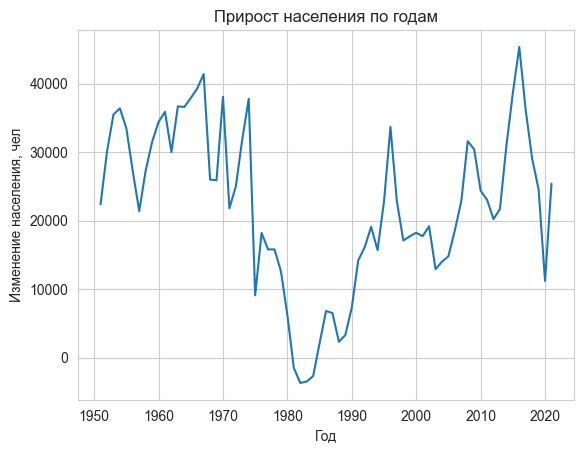

In [105]:
df_diff = df.copy()
df_diff['pop_diff'] = df_diff['pop'].diff()
display(df_diff)

sns.lineplot(df_diff, y='pop_diff', x='year')
plt.title('Прирост населения по годам')
plt.ylabel('Изменение населения, чел')
plt.xlabel('Год')

,year,pop,trend,cycle,pop_diff,Rolling_Mean,Rolling_Std,Anomaly_Rolling
25,1975,5054400.0,4.966205e+06,88195.122655,9100.0,29630.0,10038.819098,True
46,1996,5261500.0,5.295346e+06,-33846.238700,33700.0,14100.0,9725.681924,True
58,2008,5489022.0,5.516111e+06,-27088.803490,31607.0,18762.2,5341.666257,True
66,2016,5723721.0,5.687838e+06,35883.281954,45373.0,28915.4,8153.239522,True


<Axes: xlabel='year', ylabel='Anomaly_Rolling'>

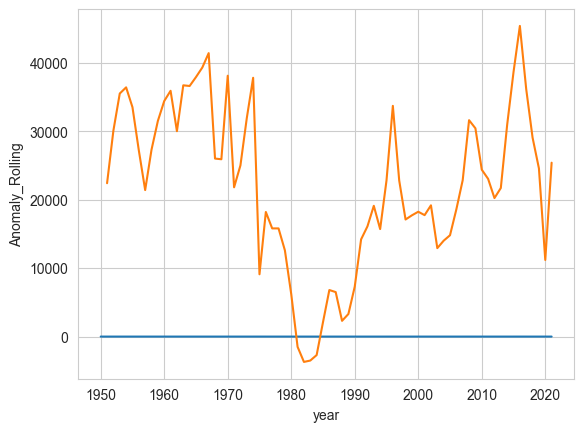

In [106]:
window = 10  # 10-летнее окно
df_diff['Rolling_Mean'] = df_diff['pop_diff'].rolling(window=window).mean()
df_diff['Rolling_Std'] = df_diff['pop_diff'].rolling(window=window).std()
df_diff['Anomaly_Rolling'] = abs(df_diff['pop_diff'] - df_diff['Rolling_Mean']) > 2*df_diff['Rolling_Std']

display(df_diff[df_diff['Anomaly_Rolling']==1])

sns.lineplot(df_diff, x='year', y='Anomaly_Rolling')
sns.lineplot(df_diff, x='year', y='pop_diff')

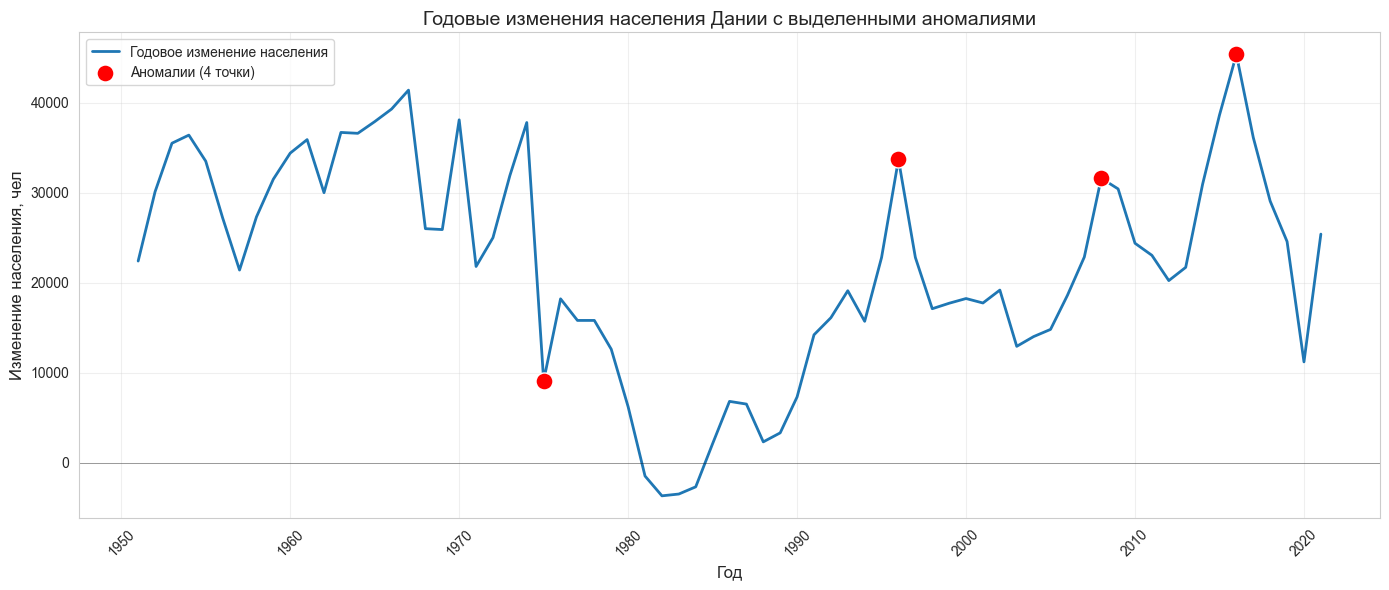

Обнаружено аномалий: 4

Аномальные годы и значения:
  1975: +9100.0 тыс. чел.
  1996: +33700.0 тыс. чел.
  2008: +31607.0 тыс. чел.
  2016: +45373.0 тыс. чел.


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем график
plt.figure(figsize=(14, 6))

# 1. Основная линия - дифференцированный ряд
sns.lineplot(data=df_diff, x='year', y='pop_diff',
             linewidth=2, label='Годовое изменение населения',
             )

# 2. Добавляем маркеры на аномальные годы
# Фильтруем только аномальные точки
anomalies = df_diff[df_diff['Anomaly_Rolling'] == 1]

# Создаем scatter plot для аномалий
sns.scatterplot(data=anomalies, x='year', y='pop_diff',
                s=150,  # размер маркера
                marker='o',  # форма маркера (круг)
                color='red',  # цвет
                label=f'Аномалии ({len(anomalies)} точки)',
                zorder=5)  # поверх других элементов

# 3. Линия нуля (горизонтальная)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)

# 4. Настраиваем график
plt.title('Годовые изменения населения Дании с выделенными аномалиями', fontsize=14, )
plt.xlabel('Год', fontsize=12)
plt.ylabel('Изменение населения, чел', fontsize=12)

# Поворачиваем подписи годов для лучшей читаемости
plt.xticks(rotation=45)

# Добавляем сетку
plt.grid(True, alpha=0.3)

# Размещаем легенду
plt.legend(loc='upper left')

# Автоматически настраиваем отступы
plt.tight_layout()

# Показываем график
plt.show()

# Дополнительно: выводим информацию об аномалиях
print(f"Обнаружено аномалий: {len(anomalies)}")
print("\nАномальные годы и значения:")
for _, row in anomalies.iterrows():
    sign = '+' if row['pop_diff'] > 0 else ''
    print(f"  {int(row['year'])}: {sign}{row['pop_diff']:.1f} тыс. чел.")

# Определение наличия тренда

In [108]:
import numpy as np
import pandas as pd
from scipy import stats

def foster_stewart_test(y, alpha=0.05):
    """
    Тест Фостера-Стюарта для определения наличия тренда во временном ряде

    Parameters:
    -----------
    y : array-like
        Временной ряд (одномерный массив или список)
    alpha : float, optional
        Уровень значимости (по умолчанию 0.05)

    Returns:
    --------
    dict : Словарь с результатами теста
    """
    y = np.array(y)
    n = len(y)

    # Инициализируем массивы для новых максимумов и минимумов
    L = np.zeros(n)  # 1 если значение больше всех предыдущих
    T = np.zeros(n)  # 1 если значение меньше всех предыдущих

    # Находим новые максимумы и минимумы
    for i in range(1, n):
        if y[i] > np.max(y[:i]):
            L[i] = 1
        if y[i] < np.min(y[:i]):
            T[i] = 1

    # Количество новых максимумов и минимумов
    S = np.sum(L) - np.sum(T)
    D = np.sum(L) + np.sum(T)

    # Расчет статистик
    E_S = 0  # Математическое ожидание S
    E_D = 0  # Математическое ожидание D

    # Расчет дисперсий
    var_S = 0
    var_D = 0

    for i in range(2, n + 1):
        E_S += 1/i
        E_D += 2/i
        var_S += (i - 1) / (i**2)
        var_D += (2 * (i - 1)) / (i**2)

    # Стандартизированные статистики
    z_S = (S - E_S) / np.sqrt(var_S)
    z_D = (D - E_D) / np.sqrt(var_D)

    # Критические значения для двухстороннего теста
    z_critical = stats.norm.ppf(1 - alpha/2)

    # p-значения
    p_value_S = 2 * (1 - stats.norm.cdf(np.abs(z_S)))
    p_value_D = 2 * (1 - stats.norm.cdf(np.abs(z_D)))

    # Интерпретация результатов
    trend_direction = "восходящий" if S > 0 else "нисходящий"

    # Проверка гипотезы о наличии тренда
    has_trend = np.abs(z_S) > z_critical

    return {
        'S': S,
        'D': D,
        'new_maxima': int(np.sum(L)),
        'new_minima': int(np.sum(T)),
        'E_S': E_S,
        'E_D': E_D,
        'var_S': var_S,
        'var_D': var_D,
        'z_S': z_S,
        'z_D': z_D,
        'z_critical': z_critical,
        'p_value_S': p_value_S,
        'p_value_D': p_value_D,
        'has_trend': has_trend,
        'trend_direction': trend_direction,
        'significance_level': alpha
    }

def print_foster_stewart_results(results):
    """
    Красивый вывод результатов теста Фостера-Стюарта
    """
    print("=" * 60)
    print("ТЕСТ ФОСТЕРА-СТЮАРТА ДЛЯ ОПРЕДЕЛЕНИЯ ТРЕНДА")
    print("=" * 60)

    print(f"\nСтатистики теста:")
    print(f"- S (разность новых максимумов и минимумов): {results['S']:.2f}")
    print(f"- D (сумма новых максимумов и минимумов): {results['D']:.2f}")
    print(f"- Количество новых максимумов: {results['new_maxima']}")
    print(f"- Количество новых минимумов: {results['new_minima']}")

    print(f"\nОжидаемые значения:")
    print(f"- E(S): {results['E_S']:.4f}")
    print(f"- E(D): {results['E_D']:.4f}")

    print(f"\nZ-статистики:")
    print(f"- z(S): {results['z_S']:.4f}")
    print(f"- z(D): {results['z_D']:.4f}")
    print(f"- Критическое значение z (α={results['significance_level']}): ±{results['z_critical']:.4f}")

    print(f"\np-значения:")
    print(f"- p(S): {results['p_value_S']:.4f}")
    print(f"- p(D): {results['p_value_D']:.4f}")

    print(f"\nРезультат:")
    if results['has_trend']:
        print(f"✓ Обнаружен статистически значимый {results['trend_direction']} тренд")
        print(f"  (|z(S)| = {np.abs(results['z_S']):.4f} > {results['z_critical']:.4f})")
    else:
        print("✗ Статистически значимый тренд не обнаружен")
    print("=" * 60)

In [109]:
res = foster_stewart_test(df['pop'].values)
print_foster_stewart_results(res)

ТЕСТ ФОСТЕРА-СТЮАРТА ДЛЯ ОПРЕДЕЛЕНИЯ ТРЕНДА

Статистики теста:
- S (разность новых максимумов и минимумов): 65.00
- D (сумма новых максимумов и минимумов): 65.00
- Количество новых максимумов: 65
- Количество новых минимумов: 0

Ожидаемые значения:
- E(S): 3.8608
- E(D): 7.7216

Z-статистики:
- z(S): 34.0205
- z(D): 22.5370
- Критическое значение z (α=0.05): ±1.9600

p-значения:
- p(S): 0.0000
- p(D): 0.0000

Результат:
✓ Обнаружен статистически значимый восходящий тренд
  (|z(S)| = 34.0205 > 1.9600)


In [110]:
y = df['pop'].values
n = len(y)

max_count = 0
current_max = y[0]

for i in range(1, n):
    if y[i] > current_max:
        max_count += 1
        current_max = y[i]

sum_inv = sum(1/i for i in range(2, n+1))

t = max_count / (2 * sum_inv)

student = float(stats.norm.ppf(1 - 0.05/2))

has_trend = t > student


print(f'{t=:.2f}')
print(f'{student=:.2f}')
print(f'{max_count=:.2f}')
print(f'{has_trend=:}')

t=8.42
student=1.96
max_count=65.00
has_trend=True


# Сглаживание

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def simple_moving_average(data, window_size, center=False):
    """
    Простая скользящая средняя (Simple Moving Average - SMA)

    Parameters:
    -----------
    data : array-like
        Исходные данные временного ряда
    window_size : int
        Размер окна сглаживания (нечетное число для center=True)
    center : bool, optional
        Если True, используется симметричное окно с центрированием

    Returns:
    --------
    array : Сглаженные значения
    """
    data = np.array(data)
    if window_size <= 0:
        raise ValueError("window_size должен быть положительным числом")

    if center:
        if window_size % 2 == 0:
            raise ValueError("Для center=True window_size должен быть нечетным")

        pad_size = window_size // 2
        padded_data = np.pad(data, (pad_size, pad_size), mode='edge')
        sma = np.convolve(padded_data, np.ones(window_size)/window_size, mode='valid')
    else:
        sma = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
        # Добавляем NaN в начало для сохранения длины
        sma = np.concatenate([np.full(window_size-1, np.nan), sma])

    return sma

In [112]:

def weighted_moving_average(data, window_size, weights=None):
    """
    Взвешенная скользящая средняя (Weighted Moving Average - WMA)

    Parameters:
    -----------
    data : array-like
        Исходные данные временного ряда
    window_size : int
        Размер окна сглаживания
    weights : array-like, optional
        Веса для каждого элемента окна. Если None, используются линейные веса

    Returns:
    --------
    array : Сглаженные значения
    """
    data = np.array(data)

    if weights is None:
        # Линейные веса: последние значения имеют больший вес
        weights = np.arange(1, window_size + 1)

    weights = np.array(weights)
    if len(weights) != window_size:
        raise ValueError(f"Длина weights ({len(weights)}) должна равняться window_size ({window_size})")

    # Нормализуем веса
    weights = weights / weights.sum()

    wma = np.convolve(data, weights[::-1], mode='valid')
    # Добавляем NaN в начало для сохранения длины
    wma = np.concatenate([np.full(window_size-1, np.nan), wma])

    return wma

In [113]:

def exponential_moving_average(data, alpha=None, span=None):
    """
    Экспоненциальная скользящая средняя (Exponential Moving Average - EMA)

    Parameters:
    -----------
    data : array-like
        Исходные данные временного ряда
    alpha : float, optional
        Параметр сглаживания (0 < alpha <= 1). Если None, используется span
    span : int, optional
        Период сглаживания. Связан с alpha: alpha = 2/(span + 1)

    Returns:
    --------
    array : Сглаженные значения
    """
    data = np.array(data)

    if alpha is None and span is None:
        span = 10  # Значение по умолчанию

    if span is not None:
        alpha = 2.0 / (span + 1)

    if not (0 < alpha <= 1):
        raise ValueError("alpha должен быть в диапазоне (0, 1]")

    ema = np.zeros_like(data, dtype=float)
    ema[0] = data[0]  # Первое значение - первое наблюдение

    for i in range(1, len(data)):
        ema[i] = alpha * data[i] + (1 - alpha) * ema[i-1]

    return ema

In [114]:

def compare_smoothing_methods(data, window_size=5, ema_span=10, plot_results=True):
    """
    Сравнение трех методов сглаживания

    Parameters:
    -----------
    data : array-like
        Исходные данные временного ряда
    window_size : int
        Размер окна для SMA и WMA
    ema_span : int
        Период сглаживания для EMA
    plot_results : bool
        Если True, строятся графики

    Returns:
    --------
    dict : Результаты сглаживания всеми методами
    """
    # Применяем все три метода
    sma_simple = simple_moving_average(data, window_size, center=False)
    sma_centered = simple_moving_average(data, window_size, center=True)

    # Для WMA используем линейные веса
    wma_linear = weighted_moving_average(data, window_size)

    # Для WMA с пользовательскими весами (например, квадратичными)
    custom_weights = np.arange(1, window_size + 1) ** 2
    wma_custom = weighted_moving_average(data, window_size, weights=custom_weights)

    # EMA с разными параметрами
    ema1 = exponential_moving_average(data, span=ema_span)
    ema2 = exponential_moving_average(data, alpha=0.1)  # Медленное сглаживание
    ema3 = exponential_moving_average(data, alpha=0.3)  # Быстрое сглаживание

    results = {
        'original': data,
        'sma_simple': sma_simple,
        'sma_centered': sma_centered,
        'wma_linear': wma_linear,
        'wma_custom': wma_custom,
        f'ema_span_{ema_span}': ema1,
        'ema_alpha_0.1': ema2,
        'ema_alpha_0.3': ema3
    }

    if plot_results:
        plot_smoothing_comparison(data, results, window_size, ema_span)

    return results

In [115]:

def plot_smoothing_comparison(original, smoothed_results, window_size, ema_span):
    """
    Визуализация сравнения методов сглаживания
    """
    fig, axes = plt.subplots(3, 2, figsize=(16, 12))
    axes = axes.flatten()

    # 1. Исходные данные
    axes[0].plot(original, 'k-', linewidth=2, alpha=0.5, label='Исходные данные')
    axes[0].set_title('Исходный временной ряд')
    axes[0].set_xlabel('Время (годы)')
    axes[0].set_ylabel('Население')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()

    # 2. Сравнение SMA
    axes[1].plot(original, 'k-', linewidth=1, alpha=0.3, label='Исходные')
    axes[1].plot(smoothed_results['sma_simple'], 'b-', linewidth=2,
                 label=f'SMA (окно {window_size})')
    axes[1].plot(smoothed_results['sma_centered'], 'g--', linewidth=2,
                 label=f'SMA центрированная (окно {window_size})')
    axes[1].set_title('Простая скользящая средняя (SMA)')
    axes[1].set_xlabel('Время (годы)')
    axes[1].set_ylabel('Население')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()

    # 3. Сравнение WMA
    axes[2].plot(original, 'k-', linewidth=1, alpha=0.3, label='Исходные')
    axes[2].plot(smoothed_results['wma_linear'], 'r-', linewidth=2,
                 label='WMA линейные веса')
    axes[2].plot(smoothed_results['wma_custom'], 'm--', linewidth=2,
                 label='WMA квадратичные веса')
    axes[2].set_title('Взвешенная скользящая средняя (WMA)')
    axes[2].set_xlabel('Время (годы)')
    axes[2].set_ylabel('Население')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()

    # 4. Сравнение EMA
    axes[3].plot(original, 'k-', linewidth=1, alpha=0.3, label='Исходные')
    axes[3].plot(smoothed_results[f'ema_span_{ema_span}'], 'c-', linewidth=2,
                 label=f'EMA (span={ema_span})')
    axes[3].plot(smoothed_results['ema_alpha_0.1'], 'y--', linewidth=2,
                 label='EMA (α=0.1)')
    axes[3].plot(smoothed_results['ema_alpha_0.3'], 'b--', linewidth=2,
                 label='EMA (α=0.3)')
    axes[3].set_title('Экспоненциальная скользящая средняя (EMA)')
    axes[3].set_xlabel('Время (годы)')
    axes[3].set_ylabel('Население')
    axes[3].grid(True, alpha=0.3)
    axes[3].legend()

    # 5. Сравнение всех основных методов
    axes[4].plot(original, 'k-', linewidth=1, alpha=0.3, label='Исходные')
    axes[4].plot(smoothed_results['sma_centered'], 'b-', linewidth=2,
                 label=f'SMA центрированная')
    axes[4].plot(smoothed_results['wma_linear'], 'r-', linewidth=2,
                 label='WMA линейная')
    axes[4].plot(smoothed_results[f'ema_span_{ema_span}'], 'g-', linewidth=2,
                 label=f'EMA')
    axes[4].set_title('Сравнение основных методов сглаживания')
    axes[4].set_xlabel('Время (годы)')
    axes[4].set_ylabel('Население')
    axes[4].grid(True, alpha=0.3)
    axes[4].legend()

    # 6. Остатки (разница между сглаженными и исходными значениями)
    time_index = np.arange(len(original))

    # Рассчитываем остатки только там, где есть значения
    valid_indices = ~np.isnan(smoothed_results['sma_centered'])
    residuals_sma = original[valid_indices] - smoothed_results['sma_centered'][valid_indices]

    residuals_ema = original - smoothed_results[f'ema_span_{ema_span}']

    axes[5].plot(time_index[valid_indices], residuals_sma, 'b-', alpha=0.7,
                 label='Остатки SMA')
    axes[5].plot(time_index, residuals_ema, 'g-', alpha=0.7,
                 label='Остатки EMA')
    axes[5].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[5].set_title('Остатки сглаживания')
    axes[5].set_xlabel('Время (годы)')
    axes[5].set_ylabel('Разность (данные - сглаженные)')
    axes[5].grid(True, alpha=0.3)
    axes[5].legend()

    plt.suptitle('Сравнение методов сглаживания временных рядов', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Дополнительный анализ качества сглаживания
    print_quality_metrics(original, smoothed_results)

In [116]:

def print_quality_metrics(original, smoothed_results):
    """
    Вывод метрик качества сглаживания
    """
    print("=" * 70)
    print("МЕТРИКИ КАЧЕСТВА СГЛАЖИВАНИЯ")
    print("=" * 70)

    metrics = {}

    for method_name, smoothed in smoothed_results.items():
        if method_name == 'original':
            continue

        # Находим индексы, где есть значения (не NaN)
        valid_mask = ~np.isnan(smoothed)
        if np.sum(valid_mask) == 0:
            continue

        orig_valid = original[valid_mask]
        smooth_valid = smoothed[valid_mask]

        # MSE (Mean Squared Error)
        mse = np.mean((orig_valid - smooth_valid) ** 2)

        # MAE (Mean Absolute Error)
        mae = np.mean(np.abs(orig_valid - smooth_valid))

        # R² (коэффициент детерминации)
        ss_res = np.sum((orig_valid - smooth_valid) ** 2)
        ss_tot = np.sum((orig_valid - np.mean(orig_valid)) ** 2)
        r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

        metrics[method_name] = {
            'MSE': mse,
            'MAE': mae,
            'R2': r2,
            'valid_points': np.sum(valid_mask)
        }

    # Выводим таблицу с метриками
    print(f"{'Метод':<20} {'MSE':<12} {'MAE':<12} {'R²':<12} {'Точек':<10}")
    print("-" * 70)

    for method_name, metric in metrics.items():
        print(f"{method_name:<20} {metric['MSE']:<12.4f} {metric['MAE']:<12.4f} "
              f"{metric['R2']:<12.4f} {metric['valid_points']:<10}")

    print("=" * 70)
    print("Примечание: меньшие значения MSE и MAE указывают на лучшее качество,")
    print("значения R² ближе к 1 указывают на лучшее соответствие тенденции.")

In [128]:

# Или используйте сгенерированные данные для примера
v = df['pop'].values  # из предыдущего примера

# Применяем методы сглаживания
window_size = 5  # Нечетное для центрированной SMA
ema_span = 5

sma_result = simple_moving_average(v, window_size, center=True)
wma_result = weighted_moving_average(v, window_size)
ema_result = exponential_moving_average(v, span=ema_span)

print("Параметры сглаживания:")
print(f"- SMA: центрированное окно {window_size} лет")
print(f"- WMA: линейные веса, окно {window_size} лет")
print(f"- EMA: период сглаживания {ema_span} лет")

# Для отчета можно получить основные статистики
print("\nОсновные статистики после сглаживания:")
print(f"Исходные данные: μ={np.nanmean(v):.0f}, σ={np.nanstd(v):.0f}")
print(f"SMA: μ={np.nanmean(sma_result):.0f}, σ={np.nanstd(sma_result):.0f}")
print(f"WMA: μ={np.nanmean(wma_result):.0f}, σ={np.nanstd(wma_result):.0f}")
print(f"EMA: μ={np.nanmean(ema_result):.0f}, σ={np.nanstd(ema_result):.0f}")

Параметры сглаживания:
- SMA: центрированное окно 5 лет
- WMA: линейные веса, окно 5 лет
- EMA: период сглаживания 5 лет

Основные статистики после сглаживания:
Исходные данные: μ=5109892, σ=406759
SMA: μ=5109900, σ=405546
WMA: μ=5127031, σ=372266
EMA: μ=5067673, σ=407621


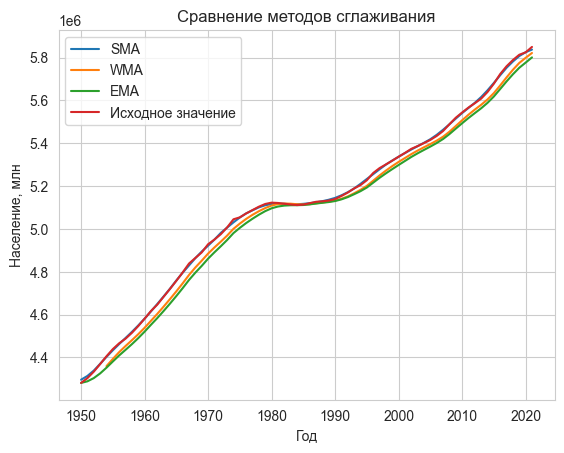

In [137]:
df['sma_result'] = sma_result
df['wma_result'] = wma_result
df['ema_result'] = ema_result

sns.lineplot(df, x='year', y='sma_result', label='SMA')
sns.lineplot(df, x='year', y='wma_result', label='WMA')
sns.lineplot(df, x='year', y='ema_result', label='EMA')
sns.lineplot(df, x='year', y='pop', label='Исходное значение')
plt.ylabel('Население, млн')
plt.xlabel('Год')
plt.title('Сравнение методов сглаживания')
plt.show()

In [132]:
def calculate_smoothing_metrics(original, smoothed, method_name="Метод"):
    """
    Вычисление метрик качества сглаживания

    Parameters:
    -----------
    original : array-like
        Исходные данные
    smoothed : array-like
        Сглаженные данные
    method_name : str
        Название метода

    Returns:
    --------
    dict : Словарь с метриками
    """
    # Удаляем NaN значения для корректного расчета
    if np.any(np.isnan(smoothed)):
        valid_mask = ~np.isnan(smoothed)
        orig_valid = original[valid_mask]
        smooth_valid = smoothed[valid_mask]
    else:
        orig_valid = original
        smooth_valid = smoothed

    # Волатильность (стандартное отклонение)
    volatility = np.std(smooth_valid)

    # Средняя абсолютная ошибка (MAE)
    mae = np.mean(np.abs(orig_valid - smooth_valid))

    # Средняя квадратичная ошибка (MSE)
    mse = np.mean((orig_valid - smooth_valid) ** 2)

    # R-квадрат (коэффициент детерминации)
    ss_res = np.sum((orig_valid - smooth_valid) ** 2)
    ss_tot = np.sum((orig_valid - np.mean(orig_valid)) ** 2)
    r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else np.nan

    # Среднее значение
    mean_value = np.mean(smooth_valid)

    # Диапазон (макс - мин)
    data_range = np.max(smooth_valid) - np.min(smooth_valid)

    # Коэффициент вариации (волатильность относительно среднего)
    cv = volatility / mean_value if mean_value != 0 else np.nan

    return {
        'Метод': method_name,
        'Волатильность (σ)': volatility,
        'Средняя ошибка (MAE)': mae,
        'R²': r2,
        'Среднее квадратичное отклонение (MSE)': mse,
        'Среднее значение': mean_value,
        'Диапазон': data_range,
        'Коэффициент вариации (CV)': cv,
        'Количество точек': len(smooth_valid)
    }


In [135]:


metrics_data = []

# Исходные данные
metrics_data.append(calculate_smoothing_metrics(v, v, "Исходные данные"))

# SMA
metrics_data.append(calculate_smoothing_metrics(v, sma_result, f"SMA (окно={window_size})"))

# WMA
metrics_data.append(calculate_smoothing_metrics(v, wma_result, f"WMA (окно={window_size})"))

# EMA
metrics_data.append(calculate_smoothing_metrics(v, ema_result, f"EMA (span={ema_span})"))

# Создаем DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Форматируем числовые столбцы
float_columns = ['Волатильность (σ)', 'Средняя ошибка (MAE)', 'R²',
                 'Среднее квадратичное отклонение (MSE)', 'Среднее значение',
                 'Диапазон', 'Коэффициент вариации (CV)']

for col in float_columns:
    if col in df_metrics.columns:
        df_metrics[col] = df_metrics[col].round(4)

display(df_metrics[['Метод', 'Волатильность (σ)', 'Средняя ошибка (MAE)', 'R²']])

,Метод,Волатильность (σ),Средняя ошибка (MAE),R²
0,Исходные данные,406759.1251,0.0000,1.0000
1,SMA (окно=5),405545.9591,3667.8806,0.9999
2,WMA (окно=5),372265.6131,29480.9765,0.9921
3,EMA (span=5),407621.2431,42218.8254,0.9867


# Характер линии тренда



In [172]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


def quick_regression_comparison(years, population):
    """
    Быстрое сравнение регрессионных моделей
    """
    X = np.array(years).reshape(-1, 1)
    y = np.array(population)

    results = {}
    predictions = {}

    for degree in [1, 2, 3]:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        r2 = r2_score(y, y_pred)

        if degree == 1:
            model_name = "Линейная"
        elif degree == 2:
            model_name = "Полиномиальная 2-й степени"
            print(f'b0= {model.intercept_}')
            print(f'b1..2= {model.coef_[1:3]}')

        else:
            model_name = "Полиномиальная 3-й степени"

        results[model_name] = r2
        predictions[model_name] = y_pred

    # Находим лучшую модель
    best_model = max(results.items(), key=lambda x: x[1])

    print(f"Лучшая модель: {best_model[0]} с R2 = {best_model[1]:.4f}")

    return results, predictions


results, predictions = quick_regression_comparison(df['year'], df['trend'])
pprint(results)

b0= -276438272.3052326
b1..2= [ 2.64434207e+05 -6.17570514e+01]
Лучшая модель: Полиномиальная 3-й степени с R2 = 0.9997
{'Линейная': 0.9911747239205929,
 'Полиномиальная 2-й степени': 0.9947171195331038,
 'Полиномиальная 3-й степени': 0.999680107682834}


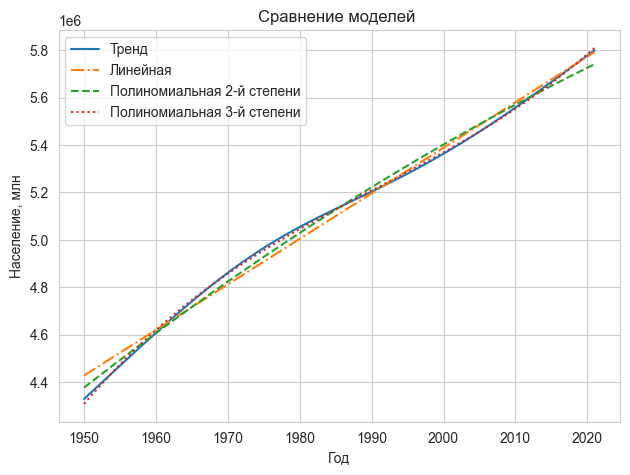

In [168]:
df_a = df.copy()
df_a['Линейная'] = predictions['Линейная']
df_a['Полиномиальная 2-й степени'] = predictions['Полиномиальная 2-й степени']
df_a['Полиномиальная 3-й степени'] = predictions['Полиномиальная 3-й степени']


sns.lineplot(df_a, x='year', y='trend', label='Тренд')
sns.lineplot(df_a, x='year', y='Линейная', label = 'Линейная',linestyle='-.')
sns.lineplot(df_a, x='year', y='Полиномиальная 2-й степени', label = 'Полиномиальная 2-й степени',linestyle='--')
sns.lineplot(df_a, x='year', y='Полиномиальная 3-й степени', label = 'Полиномиальная 3-й степени',linestyle=':')
plt.tight_layout()
plt.ylabel('Население, млн')
plt.xlabel('Год')
plt.title('Сравнение моделей ')
plt.show()

In [174]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        72 non-null     int64  
 1   pop                         72 non-null     float64
 2   trend                       72 non-null     float64
 3   cycle                       72 non-null     float64
 4   sma_result                  72 non-null     float64
 5   wma_result                  68 non-null     float64
 6   ema_result                  72 non-null     float64
 7   Линейная                    72 non-null     float64
 8   Полиномиальная 2-й степени  72 non-null     float64
 9   Полиномиальная 3-й степени  72 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 5.8 KB


# серии

In [176]:
import numpy as np
from scipy import stats

# Пример данных: остаточная компонента или исходный ряд
# Замените на ваш ряд (например, residuals)
data = np.array(df['pop'])  # ваш временной ряд

# 1. Вычисляем знаки приростов
signs = np.sign(np.diff(data))
signs = signs[signs != 0]  # удаляем нули (если есть)

# 2. Подсчёт количества серий
def count_series(s):
    if len(s) == 0:
        return 0
    series_count = 1
    for i in range(1, len(s)):
        if s[i] != s[i - 1]:
            series_count += 1
    return series_count

R = count_series(signs)

# 3. Параметры
n_plus = np.sum(signs == 1)
n_minus = np.sum(signs == -1)
n = n_plus + n_minus

# 4. Ожидаемое количество серий и дисперсия
E_R = (2 * n_plus * n_minus) / n + 1
var_R = (2 * n_plus * n_minus * (2 * n_plus * n_minus - n)) / (n**2 * (n - 1))

# 5. Z-статистика
if var_R > 0:
    Z = (R - E_R) / np.sqrt(var_R)
else:
    Z = 0

# 6. p-value (двусторонний тест)
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))

print(f"Количество серий (R) = {R}")
print(f"Ожидаемое количество серий E(R) = {E_R:.2f}")
print(f"Z-статистика = {Z:.3f}")
print(f"p-value = {p_value:.5f}")

if abs(Z) > 1.96:
    print("Ряд является неслучайным (наличие систематической составляющей).")
else:
    print("Ряд можно считать случайным.")

Количество серий (R) = 3
Ожидаемое количество серий E(R) = 8.55
Z-статистика = -6.603
p-value = 0.00000
Ряд является неслучайным (наличие систематической составляющей).


In [180]:
import numpy as np
from scipy import stats

# Остаточная компонента (residuals)
# Замените на ваши данные
residuals = np.array(df_a['pop']-df_a['trend'])  # ваш массив остатков

# 1. Основные статистики
n = len(residuals)
mean_val = np.mean(residuals)
std_val = np.std(residuals, ddof=1)  # смещённая оценка
min_val = np.min(residuals)
max_val = np.max(residuals)
range_val = max_val - min_val

# 2. RS-критерий
RS = range_val / std_val if std_val != 0 else np.nan

# 3. Коэффициент асимметрии
skewness = stats.skew(residuals, bias=False)  # несмещённая оценка

# 4. Коэффициент эксцесса
kurtosis = stats.kurtosis(residuals, bias=False)  # несмещённая оценка (уже с вычетом 3)

# 5. Тест Шапиро-Уилка (для n <= 5000)
if n >= 3 and n <= 5000:
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
else:
    shapiro_stat, shapiro_p = np.nan, np.nan
    print("Примечание: тест Шапиро-Уилка рекомендуется для n ≤ 5000")

# 6. Вывод результатов
print("=== ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===")
print(f"Объём выборки (n): {n}")
print(f"Среднее: {mean_val:.4f}")
print(f"Стандартное отклонение (S): {std_val:.4f}")
print(f"Размах (R): {range_val:.4f}")
print(f"RS-критерий (R/S): {RS:.4f}")
print(f"Ожидаемое RS для нормального распределения: ≈6")
print(f"Коэффициент асимметрии: {skewness:.4f}")
print(f"Коэффициент эксцесса: {kurtosis:.4f}")
print("---")
print("Тест Шапиро-Уилка:")
print(f"  Статистика W: {shapiro_stat:.4f}")
print(f"  p-value: {shapiro_p:.5f}")

# 7. Интерпретация
print("\n=== ИНТЕРПРЕТАЦИЯ ===")

# RS-критерий
if not np.isnan(RS):
    if 5.5 <= RS <= 6.5:
        print("✓ RS-критерий соответствует нормальному распределению (RS ≈ 6)")
    else:
        print(f"⚠ RS-критерий отклоняется от нормального распределения (RS = {RS:.2f})")

# Асимметрия
if abs(skewness) < 0.5:
    print("✓ Распределение является симметричным (|асимметрия| < 0.5)")
else:
    print(f"⚠ Распределение асимметрично (асимметрия = {skewness:.2f})")

# Эксцесс
if abs(kurtosis) < 0.5:
    print("✓ Эксцесс соответствует нормальному распределению (|эксцесс| < 0.5)")
else:
    print(f"⚠ Эксцесс отклоняется от нормального (эксцесс = {kurtosis:.2f})")

# Тест Шапиро-Уилка
if not np.isnan(shapiro_p):
    if shapiro_p > 0.05:
        print(f"✓ По тесту Шапиро-Уилка: гипотеза о нормальности не отвергается (p = {shapiro_p:.3f})")
    else:
        print(f"✗ По тесту Шапиро-Уилка: гипотеза о нормальности отвергается (p = {shapiro_p:.3f})")

# Общий вывод
print("\n=== ОБЩИЙ ВЫВОД ===")
normal_indicators = 0
total_indicators = 3

if not np.isnan(RS) and 5.5 <= RS <= 6.5:
    normal_indicators += 1
if abs(skewness) < 0.5:
    normal_indicators += 1
if abs(kurtosis) < 0.5:
    normal_indicators += 1

if normal_indicators == total_indicators and (np.isnan(shapiro_p) or shapiro_p > 0.05):
    print("Остаточная компонента соответствует нормальному распределению.")
elif normal_indicators >= 2:
    print("Остаточная компонента приближённо соответствует нормальному распределению.")
else:
    print("Остаточная компонента существенно отклоняется от нормального распределения.")

print()

=== ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===
Объём выборки (n): 72
Среднее: -0.0000
Стандартное отклонение (S): 47493.7849
Размах (R): 162618.6403
RS-критерий (R/S): 3.4240
Ожидаемое RS для нормального распределения: ≈6
Коэффициент асимметрии: 0.5875
Коэффициент эксцесса: -1.0294
---
Тест Шапиро-Уилка:
  Статистика W: 0.8983
  p-value: 0.00003

=== ИНТЕРПРЕТАЦИЯ ===
⚠ RS-критерий отклоняется от нормального распределения (RS = 3.42)
⚠ Распределение асимметрично (асимметрия = 0.59)
⚠ Эксцесс отклоняется от нормального (эксцесс = -1.03)
✗ По тесту Шапиро-Уилка: гипотеза о нормальности отвергается (p = 0.000)

=== ОБЩИЙ ВЫВОД ===
Остаточная компонента существенно отклоняется от нормального распределения.



In [184]:
import pandas as pd
import numpy as np

# Загрузка данных (предполагаем, что столбец 'population' содержит численность населения по годам)
# В вашем случае это будет отфильтрованный датасет для Дании
years = df['year']
population = df['pop']

# 1. Цепные абсолютные приросты
chain_abs_growth = population.diff()

# 2. Общий абсолютный прирост за весь период
total_abs_growth = population.iloc[-1] - population.iloc[0]

# 3. Среднегодовой абсолютный прирост
avg_abs_growth = total_abs_growth / (len(population) - 1)

# 4. Цепные темпы роста (в %)
chain_growth_rate = (population.pct_change() * 100).round(2)

# 5. Среднегодовой темп роста (геометрическое среднее)
n = len(population) - 1
avg_growth_rate = ((population.iloc[-1] / population.iloc[0]) ** (1/n) - 1) * 100

# Создание DataFrame для наглядности
results = pd.DataFrame({
    'Year': years,
    'Population': population,
    'Chain_Abs_Growth': chain_abs_growth,
    'Chain_Growth_Rate_%': chain_growth_rate
})

print("Общий абсолютный прирост:", total_abs_growth)
print("Среднегодовой абсолютный прирост:", avg_abs_growth)
print("Среднегодовой темп роста (%):", round(avg_growth_rate, 2))
print("\nТаблица цепных показателей:")
print(results.head(10))

Общий абсолютный прирост: 1568775.0
Среднегодовой абсолютный прирост: 22095.422535211266
Среднегодовой темп роста (%): 0.44

Таблица цепных показателей:
   Year  Population  Chain_Abs_Growth  Chain_Growth_Rate_%
0  1950   4281300.0               NaN                  NaN
1  1951   4303700.0           22400.0                 0.52
2  1952   4333800.0           30100.0                 0.70
3  1953   4369300.0           35500.0                 0.82
4  1954   4405700.0           36400.0                 0.83
5  1955   4439200.0           33500.0                 0.76
6  1956   4466400.0           27200.0                 0.61
7  1957   4487800.0           21400.0                 0.48
8  1958   4515100.0           27300.0                 0.61
9  1959   4546600.0           31500.0                 0.70
